In [1]:
# Package Usage
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier


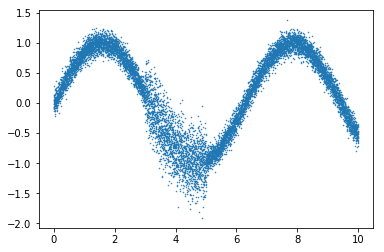

In [2]:

X=np.linspace(0, 10, num=10000)
Y1=map(lambda x:np.sin(x)+np.random.normal(0,0.1),X[0:3000])
Y2=map(lambda x:np.sin(x)+np.random.normal(0,0.3),X[3000:5000])
Y3=map(lambda x:np.sin(x)+np.random.normal(0,0.1),X[5000:])
Y=np.array(Y1+Y2+Y3)

df = pd.DataFrame()
df['X']=X
df['Y']=Y
plt.scatter(X,Y,**{"marker": ".","s": 1})


In [3]:

idx = np.random.permutation(df['X'].size)
idx_train, idx_cal, idx_test = idx[:3000], idx[3000:3999], idx[3999:]
# print X.shape,Y.shape
# print X.reshape(-1 ,1).shape
# print idx_test[1:10]
print X.reshape(-1,1)[idx_test]


[[ 3.01430143]
 [ 4.56645665]
 [ 1.41514151]
 ..., 
 [ 4.38343834]
 [ 1.33713371]
 [ 6.70367037]]


In [4]:
from nonconformist.nc import Nc_Reg_Creator
from sklearn.ensemble import RandomForestRegressor
from nonconformist.base import OptModel

func=np.sin
model=OptModel(None)
model.set_func(np.sin)
# model = RandomForestRegressor()
nc_regressor = Nc_Reg_Creator.create_nc(model)
nc_regressor.fit(X.reshape(-1 ,1)[idx_train], Y[idx_train])

nc_regressor.calibrate(X.reshape(-1 ,1)[idx_cal], Y[idx_cal])
nc_set=nc_regressor.cal_scores
print nc_set.shape
prediction =nc_regressor.predict(X.reshape(-1 ,1)[idx_test],nc_set,significance=0.02)

# d=(prediction[2][1]-prediction[2][0])/2

(999,)


In [6]:
print prediction[0:10]

[[-0.36701013  0.62090563]
 [-1.48332864 -0.49541288]
 [ 0.49395235  1.48186811]
 [-0.71432101  0.27359475]
 [-1.47575351 -0.48783776]
 [ 0.45168539  1.43960114]
 [ 0.41423638  1.40215214]
 [-0.25736334  0.73055241]
 [ 0.14018861  1.12810437]
 [ 0.20601251  1.19392826]]


In [8]:
print prediction.shape
Ys=np.split(prediction, 2, axis=1)
Ys0=Ys[0].reshape(1,6001)[0]
Ys1=Ys[1].reshape(1,6001)[0]
df1 = pd.DataFrame()
df1['X']=X[idx_test]
df1['Y']=Y[idx_test]


(6001, 2)


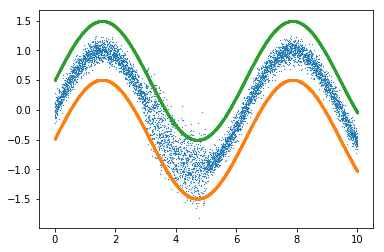

In [9]:
plt.scatter(df1['X'],df1['Y'],**{"marker": "D","s": 0.05})
plt.scatter(df1['X'],Ys0,**{"marker": "D","s": 1})

plt.scatter(df1['X'],Ys1,**{"marker": "D","s": 1})


In [16]:
def func(X):
    return np.array(map(lambda x:0, X))
model=OptModel(None)
model.set_func(func)
# model = RandomForestRegressor()
nc_regressor = Nc_Reg_Creator.create_nc(model)
nc_regressor.fit(X.reshape(-1 ,1)[idx_train], Y[idx_train])

nc_regressor.calibrate(X.reshape(-1 ,1)[idx_cal], Y[idx_cal])
nc_set=nc_regressor.cal_scores
print nc_set.shape
prediction =nc_regressor.predict(X.reshape(-1 ,1)[idx_test],nc_set,significance=0.02)

(999,)


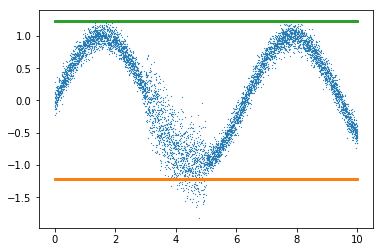

In [17]:
Ys=np.split(prediction, 2, axis=1)
Ys0=Ys[0].reshape(1,6001)[0]
Ys1=Ys[1].reshape(1,6001)[0]
df1 = pd.DataFrame()
df1['X']=X[idx_test]
df1['Y']=Y[idx_test]

plt.scatter(df1['X'],df1['Y'],**{"marker": "D","s": 0.05})
plt.scatter(df1['X'],Ys0,**{"marker": "D","s": 1})

plt.scatter(df1['X'],Ys1,**{"marker": "D","s": 1})